**Machine Learning report**

*Authors:*

>Antonio Antona

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [126]:
data = pd.read_csv('data_Features.csv')
target = pd.read_csv('data_Targets.csv')["Y4"]

In [127]:
print(target.shape)
print(data.shape)

(2556,)
(2556, 11)


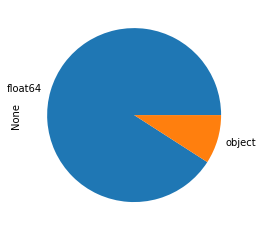

In [128]:
data.dtypes.value_counts().plot.pie()

In [129]:
data.head()

,time,t2m,u10,v10,SST,SIC,r1_MAR,r2_MAR,r3_MAR,r4_MAR,r5_MAR
0,2013-01-01,-21.926931,-0.973994,3.149094,-1.690511,90.745710,0.034537,0.033345,0.0,0.0,0.0
1,2013-01-02,-23.696195,-6.502908,2.494894,-1.690511,88.502980,0.034527,0.033326,0.0,0.0,0.0
2,2013-01-03,-25.644027,-3.557411,1.025486,-1.689860,88.734091,0.034523,0.033321,0.0,0.0,0.0
3,2013-01-04,-23.566887,-1.888075,-3.486122,-1.690511,89.149576,0.034509,0.033306,0.0,0.0,0.0
4,2013-01-05,-22.897768,-2.748844,-3.491206,-1.689860,91.613955,0.034492,0.033290,0.0,0.0,0.0


## **Analysis of the target column**
**Transform the target variable into a binary variable using an appropriate and motivated threshold.**

So we can see that the data is very poorly distributed. This is because most of the data in the target variable is 0 (about 75%) .

0      2054
1       192
2        58
3        33
4        27
       ... 
49        1
82        1
241       1
150       1
238       1
Name: Y4, Length: 78, dtype: int64


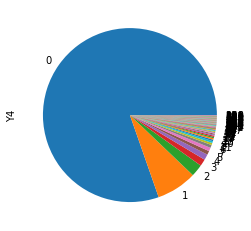

In [130]:
print(target.value_counts())
target.value_counts().plot.pie()

## **Preprocessing**

(array([2054.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         502.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

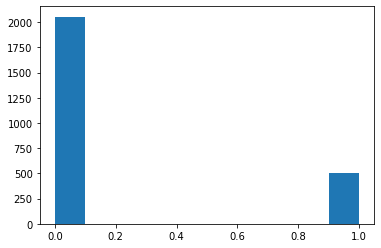

In [131]:
L = []

for x in target:
    if x == 0:
        L.append(0)
    else:
        L.append(1)

target = L

plt.hist(target)

In [132]:
finalData = data
finalData["Y4"] = target
finalData.head()

,time,t2m,u10,v10,SST,SIC,r1_MAR,r2_MAR,r3_MAR,r4_MAR,r5_MAR,Y4
0,2013-01-01,-21.926931,-0.973994,3.149094,-1.690511,90.745710,0.034537,0.033345,0.0,0.0,0.0,0
1,2013-01-02,-23.696195,-6.502908,2.494894,-1.690511,88.502980,0.034527,0.033326,0.0,0.0,0.0,0
2,2013-01-03,-25.644027,-3.557411,1.025486,-1.689860,88.734091,0.034523,0.033321,0.0,0.0,0.0,0
3,2013-01-04,-23.566887,-1.888075,-3.486122,-1.690511,89.149576,0.034509,0.033306,0.0,0.0,0.0,0
4,2013-01-05,-22.897768,-2.748844,-3.491206,-1.689860,91.613955,0.034492,0.033290,0.0,0.0,0.0,0


In [133]:
#In order to use the models we will first work without the variable time which poses problems
finalData = finalData.drop(["time"] , axis = 1)
finalData.head()

,t2m,u10,v10,SST,SIC,r1_MAR,r2_MAR,r3_MAR,r4_MAR,r5_MAR,Y4
0,-21.926931,-0.973994,3.149094,-1.690511,90.745710,0.034537,0.033345,0.0,0.0,0.0,0
1,-23.696195,-6.502908,2.494894,-1.690511,88.502980,0.034527,0.033326,0.0,0.0,0.0,0
2,-25.644027,-3.557411,1.025486,-1.689860,88.734091,0.034523,0.033321,0.0,0.0,0.0,0
3,-23.566887,-1.888075,-3.486122,-1.690511,89.149576,0.034509,0.033306,0.0,0.0,0.0,0
4,-22.897768,-2.748844,-3.491206,-1.689860,91.613955,0.034492,0.033290,0.0,0.0,0.0,0


Now let's take into account the correlation between our variables

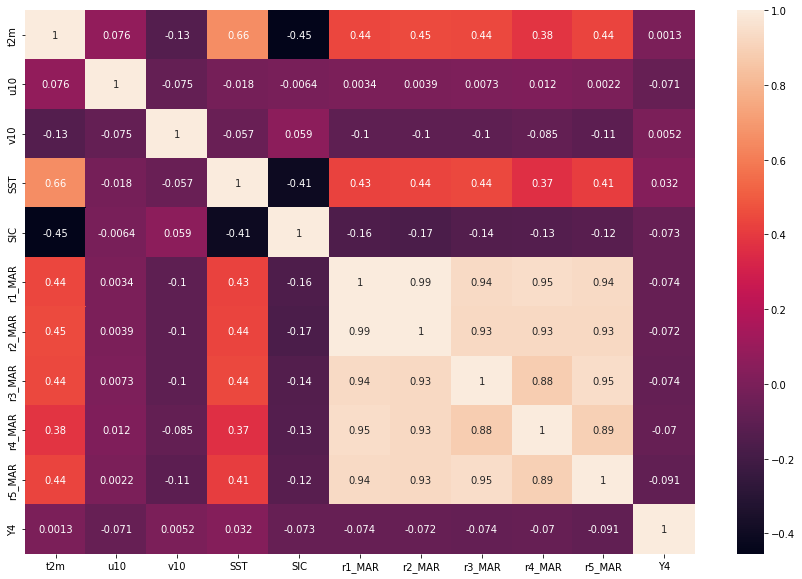

In [134]:
plt.figure(figsize=(15, 10))
corrMatrix = finalData.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [135]:
N = corrMatrix.where(np.triu(np.ones(corrMatrix.shape), k=1).astype(bool))
print([c for c in N.columns if any(abs(N[c]) > 0.9)])

['r2_MAR', 'r3_MAR', 'r4_MAR', 'r5_MAR']


Thus, we observe that the variables 'r2_MAR', 'r3_MAR', 'r4_MAR', 'r5_MAR' seem particularly correlated and have even exceeded our maximum correlation threshold fixed at 0.9.
Thus several options are available to us: The first is to take this correlation into account and build a new variable NewVariable containing the average of the correlated variables and then delete the variables mentioned. However, doing this would deprive us of a lot of data that can be useful in our model. This is why we decide not to immediately remove these variables.

##**Test and train set**

In [136]:
from sklearn.model_selection import train_test_split

In [137]:
trainset, testset = train_test_split(finalData, test_size=0.2, random_state=0)

In [138]:
trainset.shape

(2044, 11)

In [139]:
testset.shape

(512, 11)

In [140]:
trainset.head()

,t2m,u10,v10,SST,SIC,r1_MAR,r2_MAR,r3_MAR,r4_MAR,r5_MAR,Y4
1721,0.020556,7.363804,-2.125182,-0.122643,70.000000,1.025703,1.025662,0.0,0.000000e+00,0.000000e+00,0
2189,-14.552263,8.235680,2.681324,-1.689860,92.051823,0.348598,0.342233,0.0,0.000000e+00,0.000000e+00,0
1098,-7.382847,9.746191,-5.343643,-1.689860,93.822372,0.101479,0.101479,0.0,0.000000e+00,0.000000e+00,0
1002,0.225807,11.379986,-1.245571,-0.797652,70.000000,1.132794,1.132709,0.0,8.906308e-13,1.129686e-11,0
776,-20.713898,4.038459,-1.860791,-1.689210,94.932907,0.000000,0.000000,0.0,0.000000e+00,0.000000e+00,1


In [141]:
X_train = trainset.drop(["Y4"] , axis=1)
y_train = trainset["Y4"]
X_train.head()

X_test = testset.drop(["Y4"] , axis=1)
y_test = testset["Y4"]
X_test.head()


,t2m,u10,v10,SST,SIC,r1_MAR,r2_MAR,r3_MAR,r4_MAR,r5_MAR
602,0.090342,6.815134,-1.947226,-0.040705,70.000000,2.239814,2.222310,0.103111,0.062211,0.009027
563,1.219222,6.283123,-0.772717,1.053746,70.000000,136.714797,77.925982,6.806291,47.009046,29.612820
1633,-0.170327,6.124297,0.650931,-1.381619,86.392208,42.632207,33.321316,2.611551,4.538003,3.496955
276,-4.213772,0.970789,3.572798,-1.690511,0.000000,2.227712,2.222598,0.000000,0.000000,0.000000
1160,-18.764014,1.851550,4.042263,-1.690511,85.173472,0.100962,0.099845,0.000000,0.000000,0.000000


## **Evaluation**

In [142]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score

In [143]:
def plot_roc_curve(true_y, y_prob):
    """
    plots the roc curve based of the probabilities
    """

    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

def evaluation(model):
    
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv=4, scoring='f1',
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()
    
    print("using auc because our data is imbalanced")
    plot_roc_curve(y_test, ypred)
    print(f'model 1 AUC score: {roc_auc_score(y_test, ypred)}')

The target variable is imbalance so we proceed with the AUC.

The ROC AUC is sensitive to class imbalance in the sense that when there is a minority class, you typically define this as the positive class and it will have a strong impact on the AUC value. This is very much desirable behaviour. Accuracy is for example not sensitive in that way.

AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve (think integral calculus) from (0,0) to (1,1).
AUC provides an aggregate measure of performance across all possible classification thresholds. One way of interpreting AUC is as the probability that the model ranks a random positive example more highly than a random negative example.

## **Modelisation**

In [144]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [145]:
RandomForest = make_pipeline( RandomForestClassifier(random_state=0)) #No need for StandardScaler for the random Forest because the algo does not take into account the sizes of the variables
# AdaBoost = make_pipeline(preprocessor, AdaBoostClassifier(random_state=0))
SVM = make_pipeline( StandardScaler(), SVC(random_state=0))
KNN = make_pipeline( StandardScaler(), KNeighborsClassifier())

In [146]:
dict_of_models = {'RandomForest': RandomForest,
#                   'AdaBoost' : AdaBoost,
                  'SVM': SVM,
                  'KNN': KNN
                 }

RandomForest
[[402   9]
 [ 86  15]]
              precision    recall  f1-score   support

           0       0.82      0.98      0.89       411
           1       0.62      0.15      0.24       101

    accuracy                           0.81       512
   macro avg       0.72      0.56      0.57       512
weighted avg       0.78      0.81      0.77       512

using auc because our data is imbalanced
model 1 AUC score: 0.5633085206330852
SVM
[[411   0]
 [101   0]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89       411
           1       0.00      0.00      0.00       101

    accuracy                           0.80       512
   macro avg       0.40      0.50      0.45       512
weighted avg       0.64      0.80      0.71       512



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


using auc because our data is imbalanced
model 1 AUC score: 0.5
KNN
[[387  24]
 [ 89  12]]
              precision    recall  f1-score   support

           0       0.81      0.94      0.87       411
           1       0.33      0.12      0.18       101

    accuracy                           0.78       512
   macro avg       0.57      0.53      0.52       512
weighted avg       0.72      0.78      0.74       512

using auc because our data is imbalanced
model 1 AUC score: 0.5302088603020886


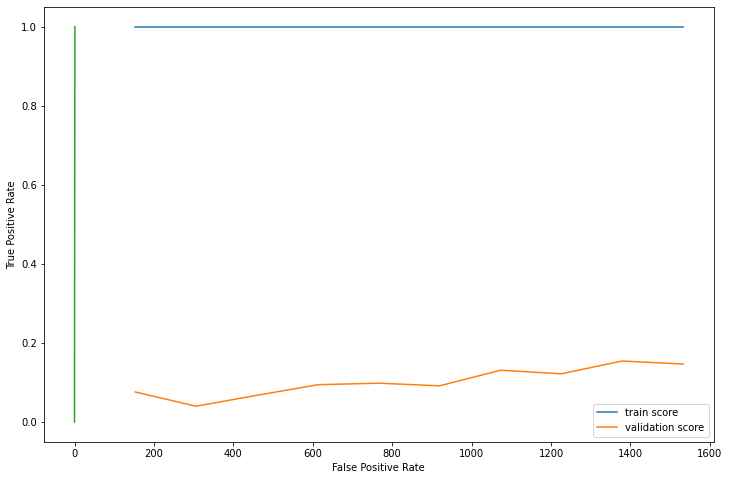

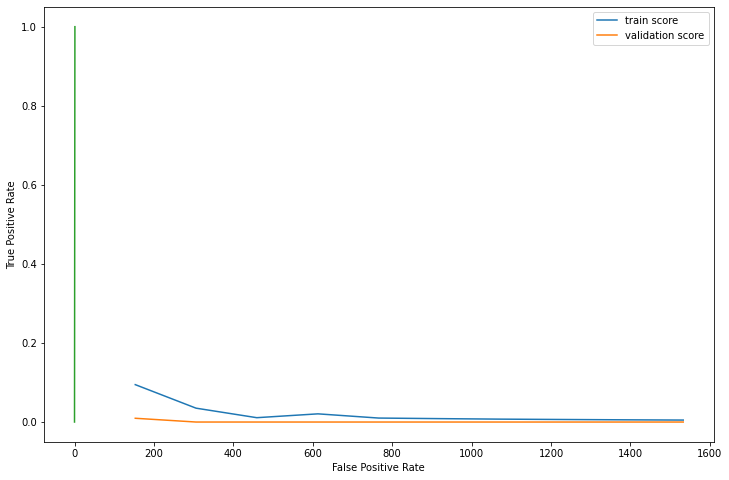

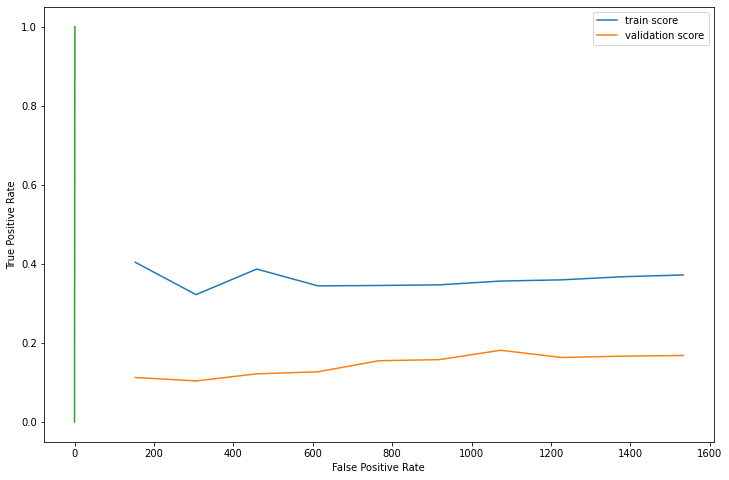

In [147]:
for name, model in dict_of_models.items():
    print(name)
    evaluation(model)


A learning curve is a plot of model learning performance over experience or time.
Learning curves are plots that show changes in learning performance over time in terms of experience.

Learning learn from a training dataset incrementally. The model can be evaluated on the training dataset and on a hold out validation dataset after each update during training and plots of the measured performance can created to show learning curves

The f1-score gives us the harmonic mean of precision and recall. The scores corresponding to every class will tell us the accuracy of the classifier in classifying the data points in that particular class compared to all other classes.

The support is the number of samples of the true response that lie in that class.

Random Forest: model who is overfitting. We can see it in particular because the score of the train score is much higher than that of the validation score

## **Random Forest best parameters**
To look at the available hyperparameters, we can create a random forest and examine the default values.

In [148]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


**Random Hyperparameter Grid**
To use RandomizedSearchCV, we first need to create a parameter grid to sample from during fitting:

In [149]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [123]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

The most important arguments in RandomizedSearchCV are n_iter, which controls the number of different combinations to try, and cv which is the number of folds to use for cross validation (we use 100 and 3 respectively). More iterations will cover a wider search space and more cv folds reduces the chances of overfitting, but raising each will increase the run time. Machine learning is a field of trade-offs, and performance vs time is one of the most fundamental.

We can view the best parameters from fitting the random search:


In [124]:
rf_random.best_params_

{'n_estimators': 1600,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

### **Improving results.**

 ***1. Voting classifier*** 
From the SGDClassifier, DecisionTreeClassifier and KNeighborsClassifier models, we count each prediction of the model as a vote and we finally choose the one that has obtained the most votes.

In [150]:
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

In [151]:
model_1 = SGDClassifier(random_state=0)
model_2 = DecisionTreeClassifier(random_state=0)
model_3 = KNeighborsClassifier(n_neighbors=2)

model_4 = VotingClassifier([('SGD', model_1),
                            ('Tree', model_2),
                            ('KNN', model_3)],
                          voting='hard')

for model in (model_1, model_2, model_3, model_4):
    model.fit(X_train, y_train)
    print(model.__class__.__name__, model.score(X_test, y_test))

SGDClassifier 0.765625
DecisionTreeClassifier 0.71875
KNeighborsClassifier 0.775390625
VotingClassifier 0.78515625


We get a slight improvement with the VotingClassifier

***2. Stacking :***

We train a machine learning model on top of the crowd predictions (SGD, Tree, KNN models). From the different models used, we train a model (here KNeighborsClassifier ) to predict the errors of our previous models to get the final result.

In [152]:
from sklearn.ensemble import StackingClassifier

In [153]:
model = StackingClassifier([('SGD', model_1),
                            ('Tree', model_2),
                            ('KNN', model_3)],
                             final_estimator=KNeighborsClassifier())

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7734375

The results are not much better than for the KNeighborsClassifier

## **Conclusion**

We can conclude that by using different models we can finally build a performant model and have good results. However, using a threshold to 1 can also not be very convenient in the real life for doing some more precise prediction. That's why we may now should use another model who can be train to predict the values distributed between 1 and 238 to be more convenient in the "real life".
